In [89]:
# Install the dependencies 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
from plotly import tools
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [90]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving all_stocks_5yr.csv to all_stocks_5yr (2).csv


In [91]:
# Store the data into a data frame
df = pd.read_csv('all_stocks_5yr.csv')
# Look at the first few elements
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [92]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [93]:
df = df.rename(columns={'Name': 'Ticks'})

In [94]:
netflix_df = df.loc[df['Ticks'] == 'NFLX']
netflix_df.head()

,date,open,high,low,close,volume,Ticks
407525,2013-02-08,25.9635,26.2800,25.7157,25.8528,25649820,NFLX
407526,2013-02-11,25.5685,26.0071,24.9714,25.4128,29321782,NFLX
407527,2013-02-12,25.8085,26.2228,25.1014,25.4214,34388802,NFLX
407528,2013-02-13,25.8428,26.6285,25.6657,26.6098,40799094,NFLX
407529,2013-02-14,26.7557,27.1214,26.3844,26.7714,31968685,NFLX


In [95]:
netflix_df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,94.854032,96.187298,93.483487,94.906152,1.620801e+07
std,50.621602,51.257739,50.024636,50.716019,1.286237e+07
min,23.355700,23.757100,22.714300,23.294300,1.616260e+06
25%,53.432800,54.041400,52.184200,53.139250,8.139126e+06
50%,91.230000,93.100000,90.110000,91.610000,1.345212e+07
75%,123.910000,125.740000,122.230000,123.720000,2.007163e+07
max,281.940000,286.810000,273.920000,284.590000,1.811000e+08


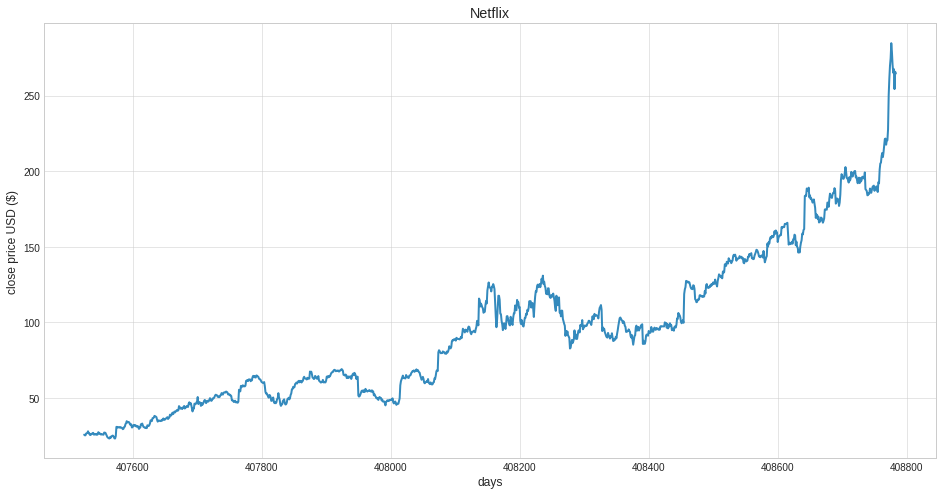

In [107]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('days')
plt.ylabel('close price USD ($)')
plt.plot(netflix_df['close'])

In [97]:
# Grabbing only the close price
netflix_df = netflix[['close']]
netflix_df.head()

,close
407525,25.8528
407526,25.4128
407527,25.4214
407528,26.6098
407529,26.7714


In [98]:
# Create a variable to predict the '730' days out into the future. 
future_days = 365 # Prediction for the next two years starting from 2013

# Create a column for the target data which predicts values x days away from 
# the current price. 
netflix_df['Prediction'] = netflix_df[['close']].shift(-future_days)
netflix_df.head()

,close,Prediction
407525,25.8528,61.1285
407526,25.4128,60.7685
407527,25.4214,60.2657
407528,26.6098,60.6657
407529,26.7714,60.6114


In [99]:
# Create the feature data set (X) and convert it to a numpy array and remove the
# last x rows/days 
x = np.array(netflix_df.drop(['Prediction'], 1))[:-future_days]
print(x)

[[ 25.8528]
 [ 25.4128]
 [ 25.4214]
 [ 26.6098]
 [ 26.7714]
 [ 27.0731]
 [ 28.0643]
 [ 26.7314]
 [ 26.7357]
 [ 25.6943]
 [ 25.6171]
 [ 26.2985]
 [ 26.3314]
 [ 26.8685]
 [ 27.0528]
 [ 25.8871]
 [ 25.9614]
 [ 26.1343]
 [ 25.9371]
 [ 26.3857]
 [ 25.7785]
 [ 26.0157]
 [ 27.48  ]
 [ 26.91  ]
 [ 26.4071]
 [ 26.5128]
 [ 25.91  ]
 [ 26.15  ]
 [ 25.9985]
 [ 25.9   ]
 [ 25.8271]
 [ 27.23  ]
 [ 27.1771]
 [ 27.04  ]
 [ 26.0614]
 [ 25.2414]
 [ 24.2485]
 [ 23.8128]
 [ 23.5228]
 [ 23.2943]
 [ 24.1943]
 [ 23.7243]
 [ 24.7157]
 [ 24.7428]
 [ 25.2143]
 [ 25.1214]
 [ 24.1943]
 [ 23.4028]
 [ 23.3385]
 [ 24.91  ]
 [ 30.9985]
 [ 30.96  ]
 [ 30.5357]
 [ 30.7928]
 [ 30.7161]
 [ 30.8671]
 [ 30.4157]
 [ 30.6414]
 [ 30.4928]
 [ 30.0985]
 [ 29.4643]
 [ 29.8014]
 [ 30.9157]
 [ 31.0991]
 [ 32.7684]
 [ 33.4243]
 [ 34.7714]
 [ 33.8614]
 [ 34.1428]
 [ 34.2214]
 [ 33.87  ]
 [ 32.6514]
 [ 32.3114]
 [ 32.6771]
 [ 30.5985]
 [ 30.7628]
 [ 31.8085]
 [ 32.3214]
 [ 31.71  ]
 [ 32.1871]
 [ 31.9228]
 [ 31.1057]
 [ 31.46  ]
 [ 3

In [100]:
# Create the target data set (y) and convert it to a numpy array and get all
# of the target values except the last (x).
y = np.array(netflix_df['Prediction'])[:-future_days]
print(y)

[ 61.1285  60.7685  60.2657  60.6657  60.6114  62.0514  60.3885  60.7714
  60.3857  60.4071  61.4714  64.2385  63.6928  64.5056  63.7728  64.5042
  64.4099  65.5842  66.5714  66.8785  67.4556  67.4356  68.4556  68.7042
  68.4799  67.8142  67.8871  68.2342  68.0856  68.1985  67.5242  67.9542
  68.4756  68.4299  69.1985  68.7942  68.0785  65.3928  65.2728  64.9328
  65.5728  65.3599  63.2542  63.4142  64.3656  63.3557  64.1071  64.2228
  64.4542  62.6857  64.2828  65.6485  66.2114  65.1785  66.6942  65.9456
  64.5828  62.6542  64.1599  64.0842  51.6714  51.0128  51.3171  52.2842
  53.5214  54.7199  55.0028  54.1999  55.1742  54.0142  54.1442  56.1099
  55.4871  54.6828  54.3399  54.7571  54.8799  55.3242  54.6499  54.8371
  54.2014  55.1485  54.4485  54.4328  51.8714  52.5914  51.4685  50.9242
  49.8557  50.1657  49.5128  48.83    50.3299  50.7314  50.0857  50.1314
  48.4971  49.1114  47.76    47.8042  47.7828  46.72    45.2057  47.6642
  47.7742  48.5885  48.0971  48.0614  48.8714  48.5

In [101]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [102]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [103]:
# Get the last 'x' rows of the feature data set
x_future = netflix_df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future 

array([[ 60.4457],
       [ 60.7442],
       [ 61.1849],
       [ 60.7142],
       [ 62.6114],
       [ 60.2499],
       [ 59.7514],
       [ 59.2528],
       [ 60.3671],
       [ 59.5271],
       [ 59.0171],
       [ 59.1542],
       [ 60.3299],
       [ 60.4942],
       [ 63.0499],
       [ 62.7857],
       [ 64.9385],
       [ 67.8114],
       [ 68.3871],
       [ 67.9228],
       [ 80.2928],
       [ 81.6499],
       [ 81.0556],
       [ 80.0628],
       [ 79.6685],
       [ 79.8656],
       [ 79.7706],
       [ 80.8685],
       [ 80.4371],
       [ 80.4071],
       [ 79.4999],
       [ 79.5756],
       [ 79.2713],
       [ 80.7928],
       [ 80.0771],
       [ 80.7485],
       [ 82.0856],
       [ 84.2778],
       [ 83.3771],
       [ 82.8728],
       [ 83.8356],
       [ 87.6071],
       [ 88.2671],
       [ 88.0685],
       [ 88.7899],
       [ 89.0028],
       [ 88.8385],
       [ 87.9928],
       [ 89.8571],
       [ 89.5071],
       [ 89.1513],
       [ 89.0028],
       [ 89.

In [104]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the linear regression model prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[117.1    97.3    97.45   97.3    95.94   97.38  100.09   99.15   99.66
  96.5    99.05   96.09   97.01   97.34   99.48  128.93   98.25   94.88
  95.83   90.49   94.56   97.07   97.48   96.67   98.55  102.34  102.34
 106.28   94.56   94.56  103.33  100.59  103.33   99.8   101.47   99.8
 118.79  121.87  123.35  127.5   121.87  126.51  126.97  126.47  115.42
 124.605 115.42  122.34  122.14  198.37  124.58  124.605 122.19  115.42
 114.78  113.38  113.59  194.39  115.03  115.21  117.96  217.5   117.69
 117.41  116.93  196.23  117.    117.22  140.25  119.16  124.57  194.39
 123.24  122.88  122.83  123.78  158.21  125.    124.22  125.45  125.12
 126.5   147.32  125.59  128.35  125.89  152.16  179.38  144.    187.35
 131.81  131.07  130.95  129.89  152.2   152.16  133.7   132.89  133.26
 138.41  157.46  137.39  140.11  132.89  138.96  157.02  141.22  140.71
 152.16  153.41  140.25  140.97  144.    144.74  144.14  154.89  143.2
 140.82  158.48  142.01  177.01  142.6   143.86  142.78  143.25  1

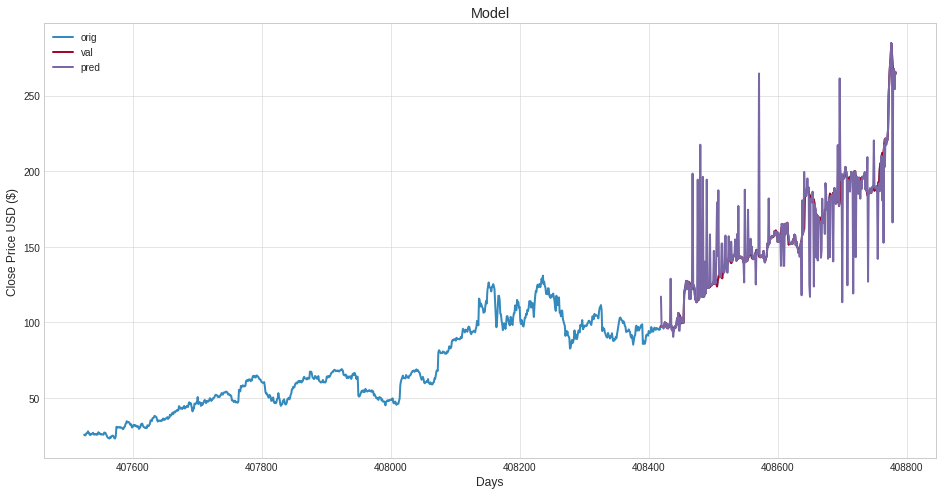

In [105]:
# Visualize the data
predictions = tree_prediction

valid = netflix_df[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(netflix_df['close'])
plt.plot(valid[['close', 'Prediction']])
plt.legend(['orig', 'val', 'pred'])
plt.show()

As we can see in the purple prediction line, when we use the **decision tree classifier**, we have a more accurate prediction to the actual value. The Netflix stock thus grows on a yearly basis. 

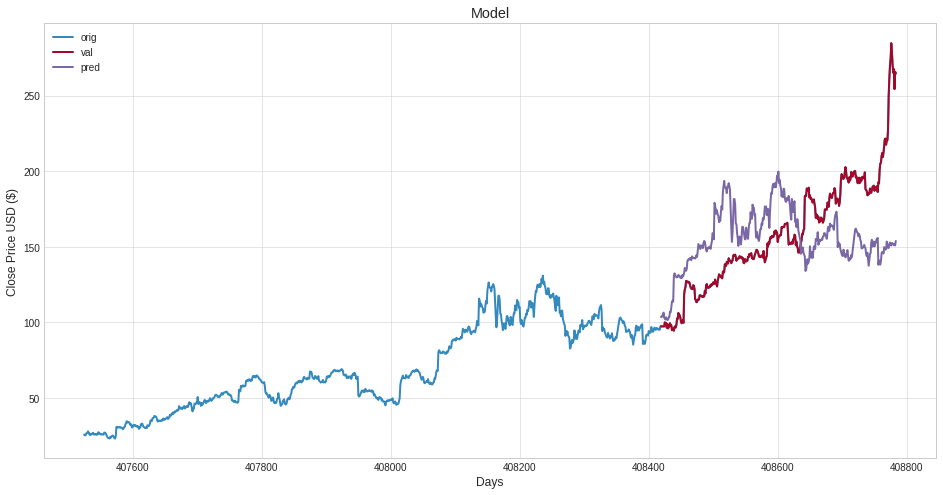

In [106]:
# Visualize the data
predictions = lr_prediction

valid = netflix_df[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(netflix_df['close'])
plt.plot(valid[['close', 'Prediction']])
plt.legend(['orig', 'val', 'pred'])
plt.show()

On the other hand, with the **linear classifier**, we see that the prediction is dips downward as opposed to the red value line which rises upwards. This indicates that the prediction is lower than the actual expected rise of the Netflix stock value. 